# Frequency of amino acids along protein sequences

Some time ago I came across an interesting blog post by [David McClure](http://dclure.org/labs/distributions-of-words-27k-novels/), where he analyzes the frequency of words across narrative time for thousands of novels. He shows that some words tend to accumulate at the beginning of the novels, others do so at the end and yet other ones occur with a more or less constant frequency across the novel. This finding makes sense. Certain words, such as descriptive words, tend to accumulate at the beginning because (usually) that's where all characters and scenarios are introduced, while other words that are linked to the story's resolution, such as _farewell_, _death_ or _murderer_ tend to accumulate at the end.

As I was reading the post I couldn't help to think about protein sequences &mdash; an example of these weird connections by brain does sometimes. If we imagine a protein as a "novel" and a word as an amino acid, how would the distribution of amino acids across protein sequence look like if we were to analyzed thousands of protein sequences at the same time? Well, I did not know, although I had some hints that told me that most likely the distributions wouldn't be uniform (amino acids, like words, have different properties depending on their chemical structures). So I went for it, downloaded the entire [Uniprot database](www.uniprot.com) containing thousands of protein sequences of hundreds of different species, and did the analyzes. Specifically, I employed the fully (human) curated part of the *Uniparc* section, where sequences are grouped in taxonomic clusters: bacteria, archaea, plants, fungi, human, vertebrates, invertebrates, and viruses. I wrote a python parser to extract the sequences from the downloaded text files and performed the analyzes. In this post, I'll share the results with the world! But first, I feel like I should give a small intro to proteins and sequences to keep this post somewhat self-contained... Here we go!

## Brief introduction to proteins
Proteins are amazing biomolecules, they fulfill numerous tasks within cells: from building structures, such as the cytoskeleton, to serving as biochemical reaction catalysts, replicate and transcribe DNA, synthesize other proteins, sense external and internal regulatory signals, regulate gene expression... to name just a few! 

Proteins are constituted by (rather long) chains of [amino acids](https://en.wikipedia.org/wiki/Amino_acid). Amino acids are very cool, rather small, molecules that have a constant part, an amino and an acid group (yeah, hence the name), and a variable part which is chemically diverse and unique to each amino acid. Additionally, the sequence in which amino acids are located is encoded in specific regions of the DNA, the genes. There are 20 [proteinogenic](https://en.wikipedia.org/wiki/Proteinogenic_amino_acid) amino acids, that is, amino acids that form proteins &mdash; well 20 plus two more that are not encoded in the [genetic code](https://en.wikipedia.org/wiki/Genetic_code).

Here is a colorful depiction* of all 20 proteinogenic amino acids encoded in the genetic code:

![aminoacids](amino-acid-structures_med.jpeg)

*Cornell, B. 2016. Amino Acids. \[ONLINE\] Available at http://ib.bioninja.com.au. \[Accessed 18 October 2018\]

The sequence in which the amino acids are arranged determines the physicochemical properties of a protein, and so its possible functions. Moreover, these amino acid chains are arranged in three-dimensional structures through a process called [protein folding](https://en.wikipedia.org/wiki/Protein_folding), and the three-dimensional arrangement is also determined by the sequence. Thus, it may happen that two amino acids positioned far away in the sequence are actually physically close in the three-dimensional structure. Also, some regions in the sequence may stay in the inner part of the protein while others may be located in the outside and hence face the surrounding medium.

Here is an example of the sequence of amino acids that constitutes a human protein, the enzyme [Fructose-bisphosphate aldolase](https://en.wikipedia.org/wiki/Fructose-bisphosphate_aldolase), which catalyzes a key reaction within the [glycolysis](https://en.wikipedia.org/wiki/Glycolysis) &mdash; a metabolic pathway that breaks down glucose into smaller molecules, obtaining energy in the process. The sequence is 364 amino acids long and can be found in the [Uniprot database](https://www.uniprot.org/uniprot/P04075) of protein sequences:

__start__ MPYQYPALTPEQKKELSDIAHRIVAPGKGILAADESTGSIAKRLQSIGTENTEENRRFYR
QLLLTADDRVNPCIGGVILFHETLYQKADDGRPFPQVIKSKGGVVGIKVDKGVVPLAGTN
GETTTQGLDGLSERCAQYKKDGADFAKWRCVLKIGEHTPSALAIMENANVLARYASICQQ
NGIVPIVEPEILPDGDHDLKRCQYVTEKVLAAVYKALSDHHIYLEGTLLKPNMVTPGHAC
TQKFSHEEIAMATVTALRRTVPPAVTGITFLSGGQSEEEASINLNAINKCPLLKPWALTF
SYGRALQASALKAWGGKKENLKAAQEEYVKRALANSLACQGKYTPSGQAGAAASESLFVS
NHAY __end__

Note that each amino acid is represented by a single letter. For instance, the first amino acid _M_ corresponds to _Methionine_ (names can be found in the picture above). As a side note, _Methionine_ is the first amino acid in almost all proteins, as the DNA sequence that codes for _Methionine_ serves as a start signal for the ribosome during [translation](https://en.wikipedia.org/wiki/Translation_(biology)) &mdash; the translation of genetic information into a protein sequence.

## And now the results!
Now that we briefly reviewed what proteins are, we are ready to crunch numbers and output some results. I wrote some python functions to read the downloaded txt files, extract all protein sequences in them, and compute the frequency of each amino acid along the protein sequence &mdash; the code can be found [here](https://github.com/Robaina/UNIPROT). To this end, first we need to partition each sequence into several bins, in this case, 30, and then count the occurrence of each amino acid in each bin (representing a fragment of the sequence). I'll repeat this process for all eight files corresponding to groups: _plants_, _human_, _bacteria_, _archaea_, _fungi_, _vertebrates_, _invertebrates_ and _viruses_. I'll also add another group which is the average across all previous groups &mdash; depicted in back in the plots below.

In [1]:
from ParseUniprot import getProteinSequences, getAAFrequencies, 
                         plotAAFrequencies, computeAverageAAFrequency
%matplotlib inline

fileNames = ['uniprot_sprot_plants.txt', 'uniprot_sprot_human.txt',
             'uniprot_sprot_bacteria.txt', 'uniprot_sprot_archaea.txt',
             'uniprot_sprot_fungi.txt', 'uniprot_sprot_vertebrates.txt',
             'uniprot_sprot_invertebrates.txt', 'uniprot_sprot_viruses.txt']

colors = {'archaea': 'red', 'bacteria': 'orange', 'fungi': 'yellow',
          'plants': 'green', 'human': 'cyan', 'vertebrates': 'blue', 
          'invertebrates': 'violet', 'viruses': 'brown', 'average': 'black'}

workDir = 'C:\\Users\\tinta\\OneDrive\\Documents\\Projects\\UNIPROT\\'

amino_acid_frequencies = {}
database_length = {}
for file in fileNames:
    group = file.split('_')[-1].split('.txt')[0]
    proteins = getProteinSequences(workDir + file)
    database_length[group] = len(proteins)
    print(f'Evaluating {group} database, with {database_length[group]} sequences')
    amino_acid_frequencies[group] = getAAFrequencies(proteins, nsections=30)
# Add average frequencies
amino_acid_frequencies['average'] = computeAverageAAFrequency(amino_acid_frequencies)

Evaluating plants database, with 41934 sequences
Evaluating human database, with 20360 sequences
Evaluating bacteria database, with 333552 sequences
Evaluating archaea database, with 19521 sequences
Evaluating fungi database, with 33465 sequences
Evaluating vertebrates database, with 18259 sequences
Evaluating invertebrates database, with 27200 sequences
Evaluating viruses database, with 16792 sequences


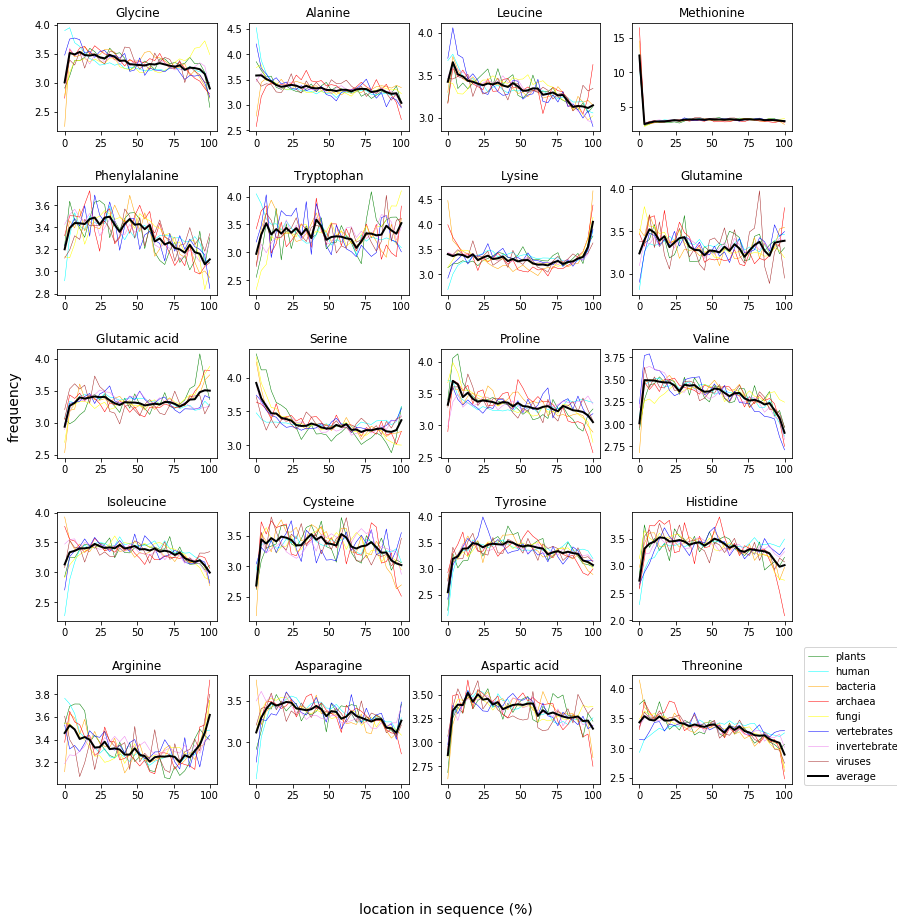

In [2]:
plotAAFrequencies(amino_acid_frequencies, colors=colors, nsections=30)

Wow! that's neat! isn't it? it does look like the distribution isn't uniform along protein sequences for most amino acids! The case of _Methionine_ is spectacular, but remember that almost all protein sequences start with this amino acid, so, that was expected. However, there are other, more interesting, cases. For instance, some amino acids are not very well represented at the beginning of the sequences for most groups, e.g.: _Valine_, _Cysteine_, _Aspartic acid_, _Tyrosine_, _Histidine_. Some tend to be better represent towards the end, like _Arginine_ and _Lysine_ while other ones'frequency tends to decrease towards the end, e.g.: _Threonine_, _Leucine_, _Phenylalanine_, or _Proline_. 

Why is this happening? Well, I don't have a clear answer. To begin with, I haven't conducted a proper statistical analysis of the distribution, the previous results were just first impressions... My guess is that it may have something to do with which parts of the protein are exposed to the (polar) cytoplasmic medium and which parts are exposed to the protein's interior or a (non-polar) cell membrane &mdash; would be the case of [transmembrane proteins](https://en.wikipedia.org/wiki/Transmembrane_protein).

Anyway, it was fun to play with the Uniprot database and to unveil these distributions along the protein sequence. Perhaps another time I'll conduct a proper analysis of these results. Or perhaps __you__ will! Whether this is the case or not, please leave your impressions in the comments below!